# Customer Churn Prediction: Data Visualization
In this notebook, we will perform an Exploratory Data Analysis (EDA) to gain insights into dataset. The goal is to explore both individual (univariate) and pairwise (bivariate) relationships between features, focusing on the key patterns that may influence customer churn.


### Import Libraries and Load Dataset

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Set global figure size for plots
plt.rcParams["figure.figsize"] = [10, 6]

# Load the cleaned dataset
try:
    df = pd.read_csv("../data/processed/cleaned_customer_churn.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print(f"File not found.")

# Display the first few rows to confirm loading
df.head()

Dataset loaded successfully!


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


### 

### Univariate Analysis
#### Distribution of Target Variable (Churn)

C:\Users\dell\AppData\Local\Temp\ipykernel_6928\983152756.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="Set2")


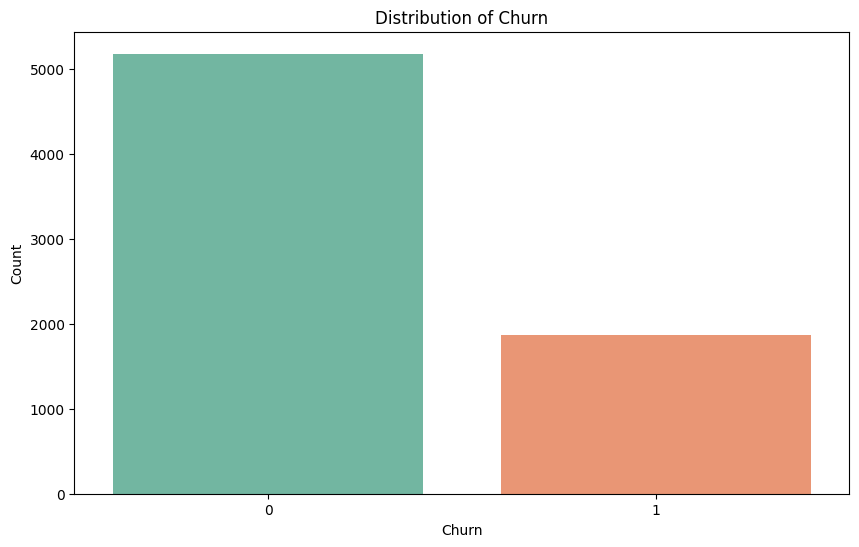

In [5]:
# Plot distribution of the target variable
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Distribution of Churn")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()

In [9]:
# Calculate churn percentage
churn_rate = df["Churn"].value_counts(normalize=True) * 100
print(churn_rate)

Churn
0    73.463013
1    26.536987
Name: proportion, dtype: float64


Around 26.5 % of customer have left based on given dataset.

#### Univariate Analysis of Numerical Features

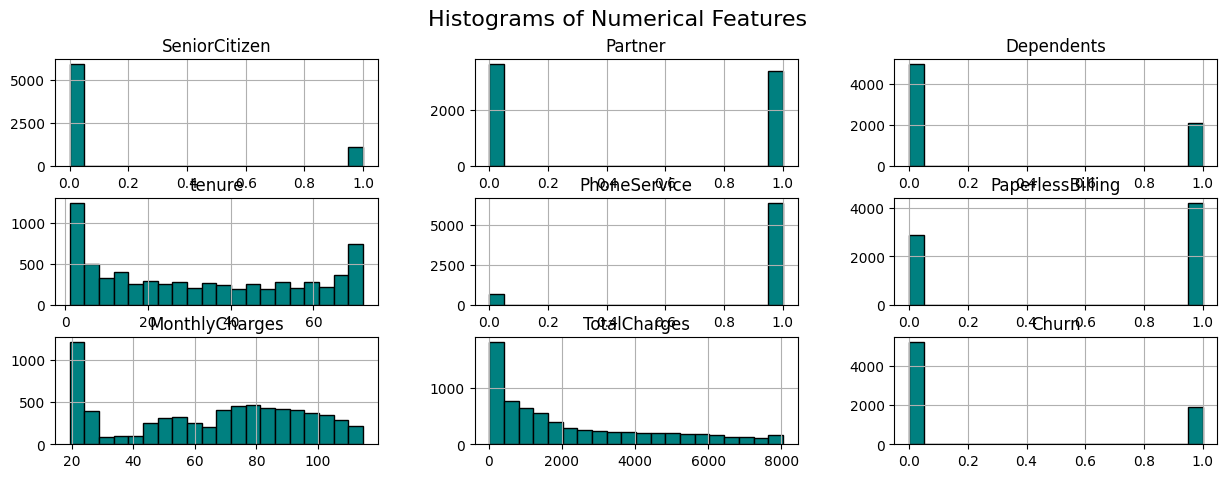

In [17]:
# List of numerical features to analyze
numerical_features = df.select_dtypes(include=["float64","int64"]).columns.to_list()

# Plot histograms for numerical features
df[numerical_features].hist(figsize=(15,5),bins=20,color="teal",edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize = 16)
plt.show()

### Bivariate Analysis
#### Churn vs Numerical Features

C:\Users\dell\AppData\Local\Temp\ipykernel_6928\3305104274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=feature, data=df, palette="Set1")
C:\Users\dell\AppData\Local\Temp\ipykernel_6928\3305104274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=feature, data=df, palette="Set1")
C:\Users\dell\AppData\Local\Temp\ipykernel_6928\3305104274.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y=feature, data=df, palette="Set1")
C:\Users\dell\AppData\Local\Temp\ipykernel_6928\3305104274.py:8: FutureWa

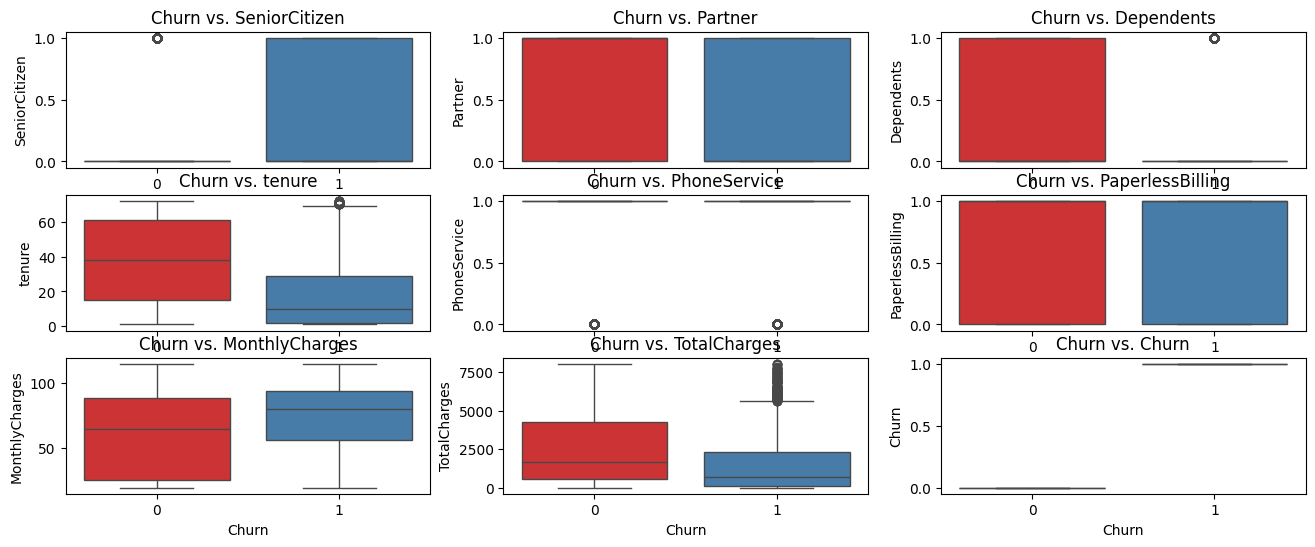

In [22]:
# Plot boxplots for numerical features vs. churn
plt.figure(figsize=(16,6))
num_features = len(numerical_features)
rows = (num_features // 3) + (num_features % 3 > 0)  # Calculate required rows

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(rows, 3, i)
    sns.boxplot(x="Churn", y=feature, data=df, palette="Set1")
    plt.title(f"Churn vs. {feature}")

plt.tight_layout
plt.show()

#### Churn vs. Categorical Features

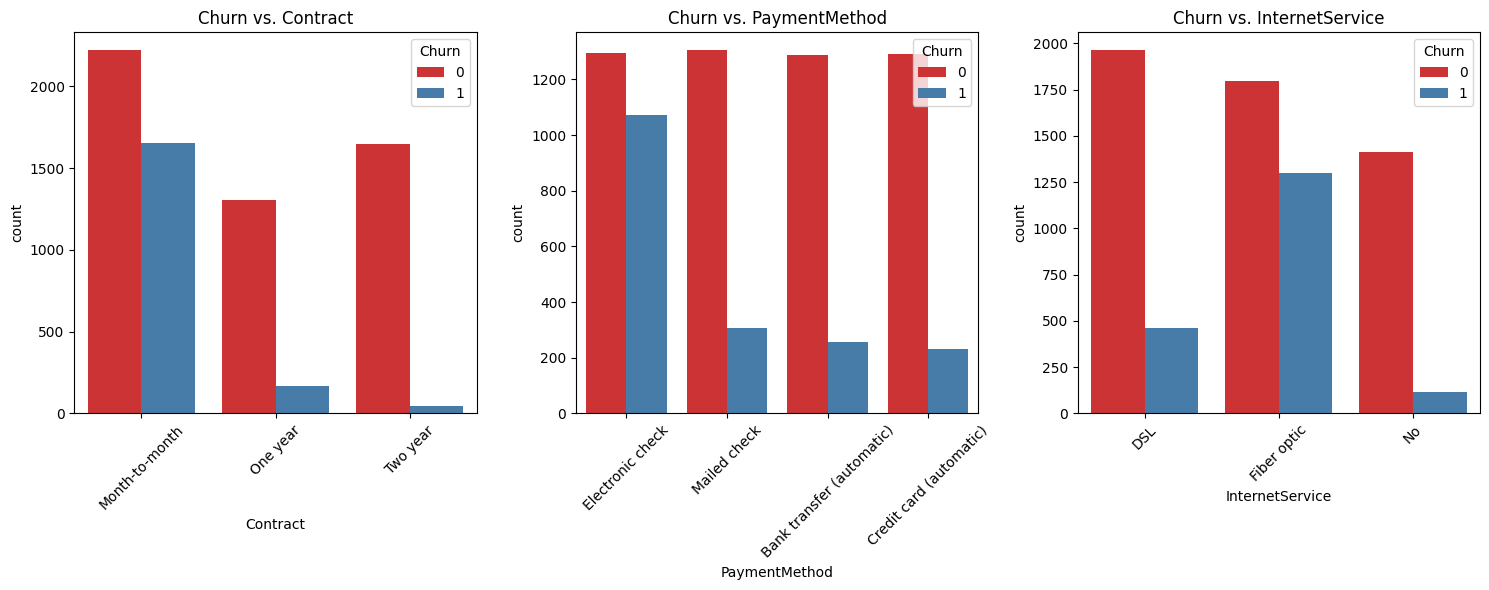

In [23]:
# List of categorical features to analyze
categorical_features = ['Contract', 'PaymentMethod', 'InternetService']

# Plot bar charts for categorical features vs. churn
plt.figure(figsize=(15, 6))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(1, 3, i)
    sns.countplot(x=feature, hue='Churn', data=df, palette='Set1')
    plt.title(f'Churn vs. {feature}')
    plt.xticks(rotation=45)
    
plt.tight_layout()
plt.show()

### Correlation Analysis for Numerical Features

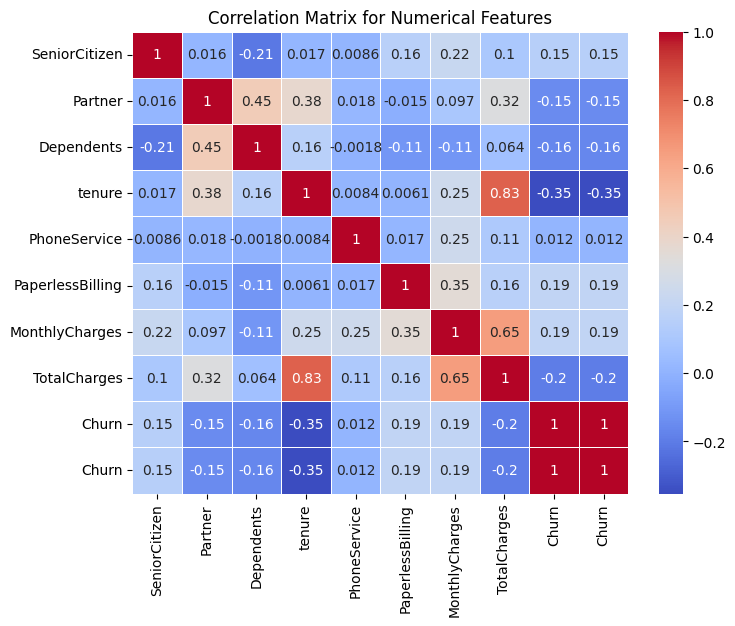

In [26]:
# Compute correlation matrix
correlation_matrix = df[numerical_features + ["Churn"]].corr()

# Plot a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features')
plt.show()